In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras.layers import *
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [35]:
df=df.drop(['Surname', 'CustomerId','RowNumber'],axis=1)

In [36]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [37]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [38]:
df = pd.concat([df,gender,states], axis = 1)

In [39]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
classifier = Sequential()

In [45]:
classifier.add(Dense(activation = "relu", input_dim = 11, units = 6, kernel_initializer = "uniform")) 

In [46]:
classifier.add(Dense(activation = "relu", units = 6, kernel_initializer = "uniform"))

In [47]:
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

In [48]:
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.7797 - loss: 0.6547
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8025 - loss: 0.5458
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.8197 - loss: 0.4876
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.8136 - loss: 0.4800
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.8199 - loss: 0.4679
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.8189 - loss: 0.4658
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8319 - loss: 0.4483
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8208 - loss: 0.4600
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.8218 - loss: 0.4632
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.8223 - loss: 0.4611
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8234 - loss: 0.4598
Epoch 12/50
700/700 ━━━━━━━━━━

In [51]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


In [52]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2301,  100],
       [ 329,  270]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

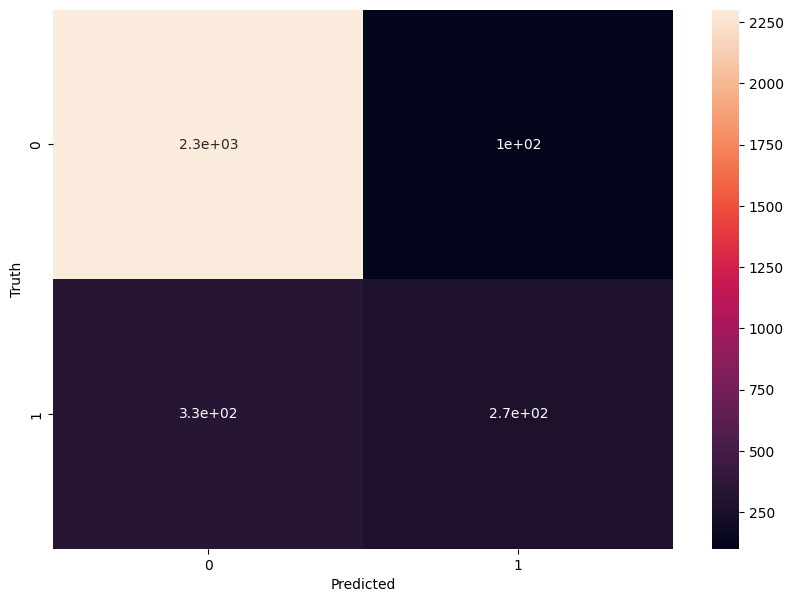

In [54]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2401
           1       0.73      0.45      0.56       599

    accuracy                           0.86      3000
   macro avg       0.80      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000

